#### Were made 100 different searchs over the Berlin graph. For each search, each algorithm runs 10 times and in each run I restart the JVM, so we can assurer that no cach is used to give an advantage to any code. Then, I take the mean time for each algorithm and store on a csv file.

#### The elapsed time to generate this data was 9h 45min 22s

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils as ut
from IPython.display import display, HTML, Markdown

## Loading the times generated from tests

The Vanila algorithm is a implementation made by Erick

In [2]:
#ut.generateTimes(n_tests=10,operations=["BerlinGraphast","BerlinVanila","BerlinGraphHopper"],save_file="../vanila_test.csv")
df = ut.loadData(file_name="../vanila_test.csv")[["Distance(m)","BerlinVanila","BerlinGraphHopper","BerlinGraphast"]]
df

Distance(m)  BerlinVanila  BerlinGraphHopper  BerlinGraphast
0         22625          38.4              122.1           160.9
1         31893          61.9              170.2           242.5
2         34659          81.1              211.8           334.2
3         13117          28.5              101.0           124.0
4         37356          70.1              184.4           283.4
5         14173          62.7              172.9           232.6
6         15503          14.4               75.8            68.2
7         30378          56.9              160.8           232.9
8         44594          75.7              189.0           343.1
9         33695          69.5              177.5           248.3
10        18268          50.7              135.4           195.1
11        39937          71.9              188.7           297.5
12        17353          67.0              171.8           262.7
13        37430          80.5              193.9           332.8
14        23796          39.4              122.4           143.6
15        12475          40.1              125.6           150.9
16        28683          71.1              178.1           290.1
17        45298          82.6              199.8           312.3
18        11777          33.0              112.3           133.5
19        21014          54.7              149.4           213.0
20         6112          13.0               75.2            62.4
21        27096          50.3              140.5           196.3
22        24849          42.4              127.3           161.8
23        24951          67.3              182.0           264.9
24        13391          53.0              160.6           200.3
25        13057          44.3              127.4           149.6
26        27302          47.9              146.8           193.5
27        47253          76.7              210.2           333.1
28        29434          58.2              162.8           213.1
29        20708          77.0              198.2           284.0
..          ...           ...                ...             ...
70        37931          78.1              191.2           324.0
71        15412          60.2              161.6           217.0
72        23997          81.5              205.2           318.3
73        16604          16.5               80.7            97.4
74        28491          81.8              209.1           329.0
75        47025          78.1              198.8           312.1
76        43397          74.8              209.8           329.9
77        24383          42.6              121.4           167.0
78        18859          67.6              184.1           280.3
79        25543          47.2              134.0           179.4
80        17094          73.0              197.7           280.3
81        45283          80.8              206.3           317.0
82         9205          15.6               80.0            75.5
83        40793          76.7              196.9           316.6
84        25670          75.5              196.5           294.2
85        27216          78.3              202.0           311.1
86        30759          57.5              170.7           217.8
87        43990          78.4              201.8           294.6
88        15963          53.9              154.9           209.7
89        28501          53.0              153.1           212.0
90        44059          77.5              201.3           334.2
91        22506          34.9              116.7           141.3
92        39660          75.5              196.1           316.1
93        25801          82.4              201.1           317.8
94        30717          77.4              222.0           325.5
95        34323          79.8              195.4           318.1
96        41318          78.2              209.8           324.6
97        24728          40.9              122.4           161.4
98        28056          69.3              200.3           301.4
99        21620          72.4          

## Analysing the times

### Mean time of the algorithms

In [3]:
df.mean()

Distance(m)          27177.540
BerlinVanila            61.006
BerlinGraphHopper      166.625
BerlinGraphast         243.468
dtype: float64

### Median of the times

In [4]:
df.median()

Distance(m)          26362.50
BerlinVanila            66.15
BerlinGraphHopper      175.20
BerlinGraphast         253.25
dtype: float64

### Standard Deviation

In [5]:
df.std()

Distance(m)          10254.714928
BerlinVanila            19.258019
BerlinGraphHopper       39.390817
BerlinGraphast          77.133532
dtype: float64

### Time for each algorithm execute a search

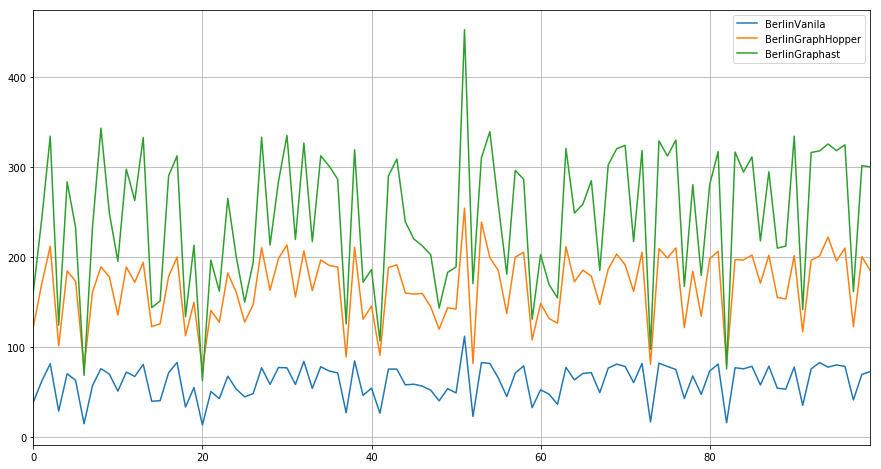

In [6]:
%config InlineBackend.figure_format = 'png'
distances = df.columns[1:]
#print(distances)
plot = df.loc[:,distances].plot(grid=True, figsize=(15,8)).legend(bbox_to_anchor=(1.0, 1))

### Histogram of the times

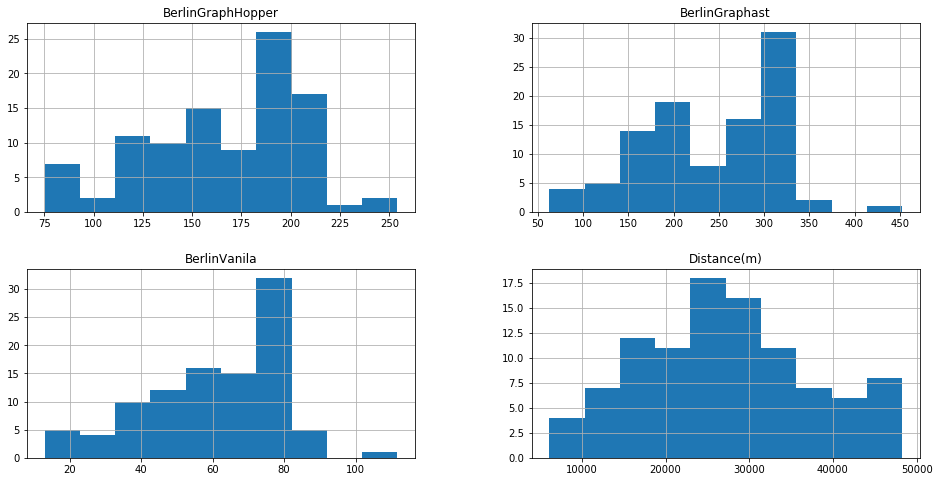

In [7]:
plot = df.hist(figsize=(16,8))

### The data
In red, we have the algorithm that has taken more time to execute the search and, in green, the fastest one

In [9]:
col = {c:c.replace("Berlin","") for c in df.columns if c!="Distance(m)"}
df.rename(columns=col,inplace=True)
df.sort_values("Distance(m)")
s = df.style.apply(ut.highlight_max,subset=list(col.keys()),axis=1)\
    .apply(ut.highlight_min,subset=list(col.keys()),axis=1)\
    .set_properties(**{'text-align': 'right'})
    
display(HTML(s.render()))

## Loading the memory used in the algorithms

In [ ]:
memData = ut.loadMemoryData()

### Analysing general memory use

In [ ]:
ut.plotMemoryUse(memData)

### Vanila memory used

In [ ]:
ut.plotPie(memData,"Vanila")    

### GraphHopper memory used

In [ ]:
ut.plotPie(memData,"GraphHopper")

### GraphHopperContracted memory used

In [ ]:
ut.plotPie(memData,"GraphHopperContracted")

### Graphast memory used

In [ ]:
ut.plotPie(memData,"Graphast")

## Top 5 biggest classes from the algorithms:
#### VN - Vanila
#### GHC - GraphHopperContracted
#### GH - GraphHopper
#### GP - Graphast

In [ ]:
ut.plotTopMemoryClasses(memData)